In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
from sklearn import metrics
from sklearn import linear_model
import torch

In [2]:
# loads MNIST data and reformat to 768-d vectors with values in range 0 to 1
# splits into train/val/test sets and provides indices for subsets of train
def load_mnist():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  x_train = np.reshape(x_train, (len(x_train), 28*28))
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval
  x_test = x_test/maxval
  x_val = x_train[:10000]
  y_val = y_train[:10000]
  x_train = x_train[10000:]
  y_train = y_train[10000:]
  train_indices = dict()
  train_indices['xs'] = np.arange(50)
  train_indices['s'] = np.arange(500)
  train_indices['m'] = np.arange(5000)
  train_indices['all'] = np.arange(50000)
  return (x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices

# displays a set of mnist images
def display_mnist(x, subplot_rows=1, subplot_cols=1):
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

# counts the number of examples per class
def class_count_mnist(y):
  count = np.zeros((10,),dtype='uint32')
  for i in np.arange(10):
    count[i] = sum(y==i)
  return count

11490434/11490434 [==============================] - 1s 0us/step


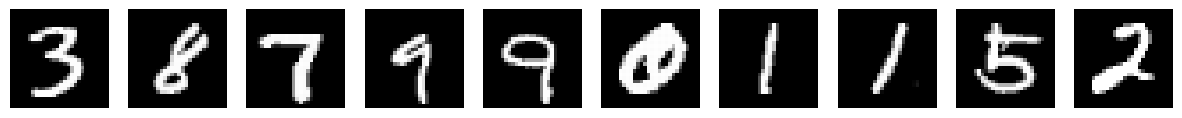

Total size: train=50000, val=10000, test =10000
Train subset size: xs=50, s=500, m=5000, all=50000
Class count for s: [56 57 51 49 46 46 50 51 40 54]


In [3]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
display_mnist(x_train[:10],1,10)
print('Total size: train={}, val={}, test ={}'.format(len(x_train), len(x_val), len(x_test)))
print('Train subset size: xs={}, s={}, m={}, all={}'.format(len(train_indices['xs']),len(train_indices['s']),len(train_indices['m']),len(train_indices['all'])))
print('Class count for s: {}'.format(class_count_mnist(y_train[train_indices['s']])))

 ### K-Nearest Neighbors (KNN) 

In [20]:
def euclidean_distance(x1,x2):
  dist = np.sqrt(np.sum((x2-x1)**2))
  return dist

In [21]:
def classify_KNN(X_trn, y_trn, X_tst, K=1):
  y_pred = []
  for i in X_tst: 
    z = []
    for j in range(len(X_trn)): 
      dis = euclidean_distance(np.array(X_trn[j,:]) , i) 
      z.append(dis) 
    z = np.array(z) 
    b = np.argsort(z)[:K] 
    classes = y_trn[b]
    q = mode(classes) 
    q = q.mode[0]
    y_pred.append(q)
  return y_pred

<ipython-input-21-523a4f9b8d22>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  q = mode(classes)


0.36


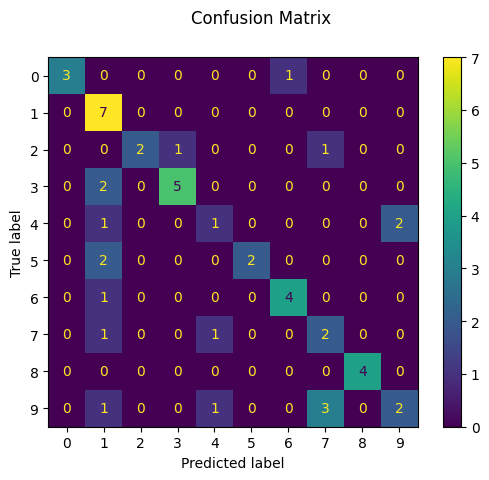

In [22]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), train_indices = load_mnist()
x_50=x_train[:50]
y_50=y_train[:50]
x_v_50=x_val[:50]
y_v_50=y_val[:50]
x_test_50=x_test[:50]
y_test_50=y_test[:50]

KNN_50= classify_KNN(x_50, y_50 ,x_v_50, 1)
print(1-np.mean(KNN_50==y_v_50))
ConfusionMatrix_50 = metrics.ConfusionMatrixDisplay.from_predictions(y_v_50,KNN_50)
ConfusionMatrix_50.figure_.suptitle("Confusion Matrix")
plt.show()

In [23]:
for i in range(1,25):
  KNN= classify_KNN(x_50, y_50 ,x_test_50, i)
  print(i,(1-np.mean(KNN==y_test_50)))

<ipython-input-21-523a4f9b8d22>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  q = mode(classes)


1 0.36
2 0.43999999999999995
3 0.48
4 0.42000000000000004
5 0.5
6 0.45999999999999996
7 0.52
8 0.56
9 0.5800000000000001
10 0.56
11 0.56
12 0.5800000000000001
13 0.6
14 0.6599999999999999
15 0.74
16 0.72
17 0.72
18 0.72
19 0.7
20 0.76
21 0.78
22 0.78
23 0.78
24 0.78


<ipython-input-21-523a4f9b8d22>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  q = mode(classes)


0.03310000000000002


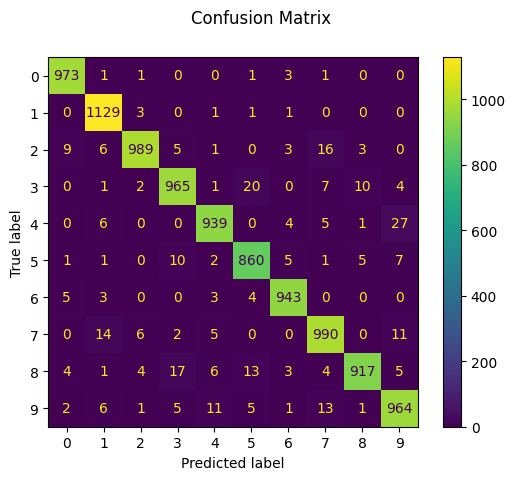

In [24]:
KNN_50000= classify_KNN(x_train, y_train , x_test, 1)
print(1-np.mean(KNN_50000==y_test))
ConfusionMatrix_50000 = metrics.ConfusionMatrixDisplay.from_predictions(y_test,KNN_50000)
ConfusionMatrix_50000.figure_.suptitle("Confusion Matrix")
plt.show()

### Naive Bayes (NB)

In [16]:
def train_NB_mnist_1(X, y, alpha=1):
  pxy=np.zeros((784,10,2))
  for i in range(784):
    for k in range(0,10):
      pxy[i,k,0]= (np.sum((X[:,i]==0)&(np.matrix(y)==k))+alpha)/(np.sum(np.matrix(y)==k)+alpha*2)
      pxy[i,k,1]= (np.sum((X[:,i]==1)&(np.matrix(y)==k))+alpha)/(np.sum(np.matrix(y)==k)+alpha*2)
  return pxy

def eval_NB_mnist(pxy, X):

  m = X.shape[0]
  k=10
  y_pred = []
  m=X.shape[0]
  for i in range(m): 
    class_hat = []  
    for j in range(k):
      prob = 1
      for t in range(X.shape[1]):
        if X[i][t] == 1:
          prob = prob*pxy[t][j][1]
        else:
          prob =prob* pxy[t][j][0]
      class_hat.append(abs(prob))
    y_pred.append(np.argmax(class_hat))
  return y_pred

In [17]:
x_train_nb=(x_train>0.5).astype('int')
x_train_nb=(x_train_nb*x_train_nb)
x_val_nb=(x_val>0.5).astype('int')
x_val_nb=(x_val_nb*x_val_nb)
x_test_nb=(x_test>0.5).astype('int')
x_test_nb=(x_test_nb*x_test_nb)

In [18]:
alp=[0.00001,0.0001,0.001,0.1,1,2,3]
for i in alp:
  o=train_NB_mnist_1(x_train_nb[:50000], y_train[:50000], alpha=i)
  r=eval_NB_mnist(o, x_val_nb[:50000])
  err=1-np.mean(y_val[:50000]==r)
  print(i,err)

1e-05 0.16159999999999997
0.0001 0.16180000000000005
0.001 0.16190000000000004
0.1 0.1623
1 0.1632
2 0.16369999999999996
3 0.16379999999999995


In [19]:
alp=[0.00001,0.0001,0.001,0.1,1,2,3]
for i in alp:
  o=train_NB_mnist_1(x_train_nb[:50000], y_train[:50000], alpha=i)
  r=eval_NB_mnist(o, x_test_nb[:50000])
  err=1-np.mean(y_test[:50000]==r)
  print(i,err)

1e-05 0.1552
0.0001 0.1552
0.001 0.1553
0.1 0.15590000000000004
1 0.15659999999999996
2 0.15710000000000002
3 0.15749999999999997


### Logistic regression

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [6]:
c=[0.0001,0.001,0.1,1,2,3]
for i in c:
  model = LogisticRegression(C=i)
  k=model.fit(x_train, y_train)
  q=k.predict(x_test)
  print(i,1-np.mean(q==y_test))

0.0001 0.14500000000000002


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.001 0.10089999999999999


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1 0.07499999999999996


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1 0.07369999999999999


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2 0.07369999999999999
3 0.07369999999999999


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### MLP

In [7]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [8]:
def display_error_curves(num_epochs, training_losses, validation_losses):

  plt.plot(range(num_epochs), training_losses, label="Training Loss")
  plt.plot(range(num_epochs), validation_losses, label="Validation Loss")

  # Add in a title and axes labels
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  
  # Display the plot
  plt.legend(loc='best')
  plt.show()

In [9]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.layers = torch.nn.Sequential(
          torch.nn.Linear(input_size, hidden_size),
          torch.nn.ReLU(),
          torch.nn.Linear(hidden_size, output_size)
          
       )
        
    def forward(self, x):
      
      return self.layers(x)

In [10]:
def train_MLP_mnist(x_train,y_train,x_val, y_val,x_test, y_test,train_loader, val_loader, lr, num_epochs):
  
  input_size = 784
  hidden_size = 128
  #hidden_size = 64
  output_size = 10

  # Instantiate the model
  mlp = MLP(input_size, hidden_size, output_size)
  #optmizer= torch.optim.SGD(mlp.parameters(),lr=lr)
  optmizer=torch.optim.Adam(mlp.parameters(),lr=lr)

  tr_loss=[]
  val_loss=[]
  train_acc=[]
  epoch_1=[]
  loss_function = torch.nn.CrossEntropyLoss()
  # Train the model
  for epoch in range(0, num_epochs):
    epoch_1.append(epoch)
    current_tr_loss = 0
    current_val_loss=0
    for i, data in enumerate(train_loader, 0):
      inputs, targets = data 
      optmizer.zero_grad() 
      outputs = mlp(inputs)  
      loss = loss_function(outputs, targets) 
      loss.backward() 
      optmizer.step() 
    
      current_tr_loss += loss.item()*len(inputs)
      
    tr_loss.append(current_tr_loss / len(train_loader.sampler))
    
    
    with torch.no_grad():
      for i, data in enumerate(val_loader, 0):
        inputs, targets = data 
        outputs = mlp(inputs)  
        loss = loss_function(outputs, targets)

        current_val_loss += loss.item()*len(inputs)

      val_loss.append(current_val_loss / len(val_loader.sampler))
  # Display Loss Curves
  outputs_tr=mlp(torch.Tensor(x_train)).detach().numpy()
  y_pred_tr= np.argmax(outputs_tr,axis=1)
  print("train error:",np.mean(y_pred_tr!=y_train))

  outputs_val=mlp(torch.Tensor(x_val)).detach().numpy()
  y_pred_val= np.argmax(outputs_val,axis=1)
  print("val error:",np.mean(y_pred_val!=y_val))

  outputs_test=mlp(torch.Tensor(x_test)).detach().numpy()
  y_pred_test= np.argmax(outputs_test,axis=1)
  print("test error:",np.mean(y_pred_test!=y_test))

  print(tr_loss[-1])
  print(val_loss[-1])
  display_error_curves(num_epochs, tr_loss, val_loss)
  
  return mlp

In [11]:
trainset = torch.utils.data.TensorDataset(torch.Tensor(x_train), torch.Tensor(np.eye(10)[y_train]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=1)
valset = torch.utils.data.TensorDataset(torch.Tensor(x_val), torch.Tensor(np.eye(10)[y_val]))
val_loader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=True, num_workers=1)

train error: 0.1224
val error: 0.1291
test error: 0.1306
0.4224420636177063
0.5746949281215668


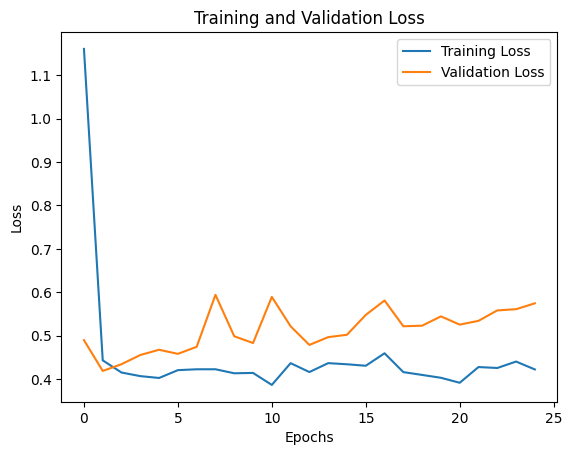

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [12]:
train_MLP_mnist(x_train,y_train,x_val, y_val,x_test, y_test,train_loader, val_loader, lr=0.1, num_epochs=25)

train error: 0.08432
val error: 0.0959
test error: 0.0962
0.41240787132263185
0.9910759377479553


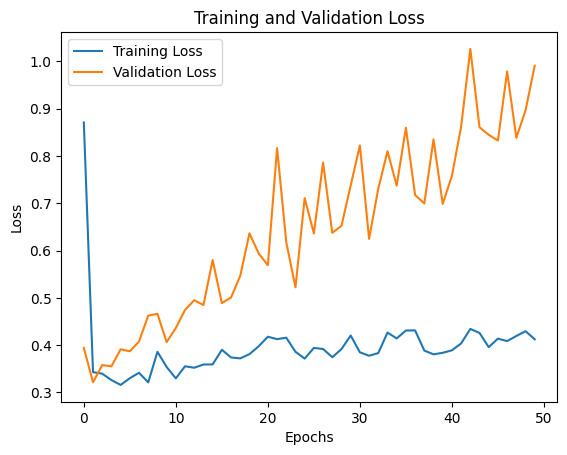

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [13]:
train_MLP_mnist(x_train,y_train,x_val, y_val,x_test, y_test,train_loader, val_loader, lr=0.1, num_epochs=50)

train error: 0.11072
val error: 0.1276
test error: 0.1277
0.44292357886314393
0.8952208594560623


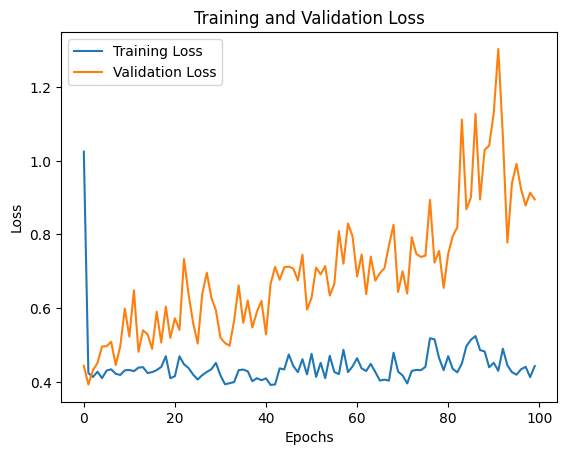

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [14]:
train_MLP_mnist(x_train,y_train,x_val, y_val,x_test, y_test,train_loader, val_loader, lr=0.1, num_epochs=100)

train error: 0.0
val error: 0.0221
test error: 0.0215
6.471962801879272e-05
0.12579833217859265


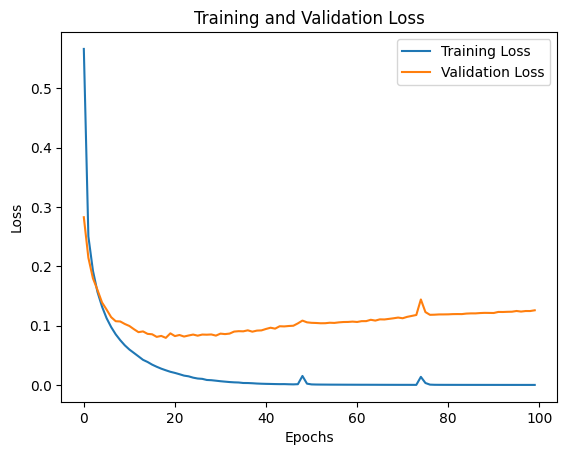

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [15]:
torch.manual_seed(0)
train_MLP_mnist(x_train,y_train,x_val, y_val,x_test, y_test,train_loader, val_loader, lr=0.001, num_epochs=100)